In [1]:
# We are going to analyze the AirBnB ratings in Berlin in 2017.

# Source of the dataset: http://insideairbnb.com/get-the-data.html


In [2]:
# importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
airbnb = pd.read_csv('dataset/Airbnb_Berlin.csv', encoding = 'latin-1', low_memory=False)
airbnb.head(5)

,Review ID,review_date,Reviewer ID,Reviewer Name,Comments,Listing ID,Listing URL,Listing Name,Host ID,Host URL,...,Last Review,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,Instant Bookable,Business Travel Ready
0,58660447.0,2016-01-03,14876562.0,Dennis,"Very nice, clean appartement! Josh was really ...",10002699,https://www.airbnb.com/rooms/10002699,Trendy and peaceful KreuzkÃ¶lln,44696672,https://www.airbnb.com/users/show/44696672,...,2016-01-03,100.0,8.0,10.0,6.0,10.0,10.0,10.0,f,f
1,NaN,NaN,NaN,NaN,NaN,10002922,https://www.airbnb.com/rooms/10002922,Sehr zentrale Wohnung in Berlin,45848709,https://www.airbnb.com/users/show/45848709,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f
2,58663795.0,2016-01-03,49367757.0,Andreea,Aki is really nice and friendly. We had an ama...,10006647,https://www.airbnb.com/rooms/10006647,Very central and very quite,40791092,https://www.airbnb.com/users/show/40791092,...,2017-02-12,92.0,9.0,8.0,9.0,10.0,10.0,9.0,f,f
3,59003619.0,2016-01-05,46694292.0,Sasha,Aki is a very nice dude with a clean place in ...,10006647,https://www.airbnb.com/rooms/10006647,Very central and very quite,40791092,https://www.airbnb.com/users/show/40791092,...,2017-02-12,92.0,9.0,8.0,9.0,10.0,10.0,9.0,f,f
4,66845661.0,2016-03-25,54542819.0,Yohana,Aki's place was easy to find and located in th...,10006647,https://www.airbnb.com/rooms/10006647,Very central and very quite,40791092,https://www.airbnb.com/users/show/40791092,...,2017-02-12,92.0,9.0,8.0,9.0,10.0,10.0,9.0,f,f


In [4]:
# Checking the size of the dataset

airbnb.shape

(456961, 46)

In [5]:
# As the dataset is way too big to be processed efficiently, I will first remove the lines and columns that are not complete.

In [6]:
# I drop the rows where at least one element is missing

airbnb_clean01 = airbnb.dropna()
airbnb_clean01

,Review ID,review_date,Reviewer ID,Reviewer Name,Comments,Listing ID,Listing URL,Listing Name,Host ID,Host URL,...,Last Review,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,Instant Bookable,Business Travel Ready
1118,4745708.0,2013-05-23,5830583.0,Ciara,We had a wonderful time in Berlin staying in t...,1004686,https://www.airbnb.com/rooms/1004686,"NICE APARTMENT, BEST LOCATED",5417382,https://www.airbnb.com/users/show/5417382,...,2019-01-02,96.0,10.0,9.0,10.0,10.0,10.0,10.0,f,f
1119,6120899.0,2013-07-30,3975328.0,Tim&Rosa,Great flat! good location and well furnished. ...,1004686,https://www.airbnb.com/rooms/1004686,"NICE APARTMENT, BEST LOCATED",5417382,https://www.airbnb.com/users/show/5417382,...,2019-01-02,96.0,10.0,9.0,10.0,10.0,10.0,10.0,f,f
1120,6509231.0,2013-08-15,1351987.0,Seppe,"Central location in Friedrichshain, fun, comfo...",1004686,https://www.airbnb.com/rooms/1004686,"NICE APARTMENT, BEST LOCATED",5417382,https://www.airbnb.com/users/show/5417382,...,2019-01-02,96.0,10.0,9.0,10.0,10.0,10.0,10.0,f,f
1121,8306885.0,2013-10-25,3110640.0,Alastair,The reservation was canceled 21 days before ar...,1004686,https://www.airbnb.com/rooms/1004686,"NICE APARTMENT, BEST LOCATED",5417382,https://www.airbnb.com/users/show/5417382,...,2019-01-02,96.0,10.0,9.0,10.0,10.0,10.0,10.0,f,f
1122,8907197.0,2013-11-25,2313604.0,Thomas,Das erste mal via airbnb gebucht und ---- bin ...,1004686,https://www.airbnb.com/rooms/1004686,"NICE APARTMENT, BEST LOCATED",5417382,https://www.airbnb.com/users/show/5417382,...,2019-01-02,96.0,10.0,9.0,10.0,10.0,10.0,10.0,f,f
1123,10312355.0,2014-02-12,4727766.0,Lauren,We had a great stay in Julien's appartment! Ve...,1004686,https://www.airbnb.com/rooms/1004686,"NICE APARTMENT, BEST LOCATED",5417382,https://www.airbnb.com/users/show/5417382,...,2019-01-02,96.0,10.0,9.0,10.0,10.0,10.0,10.0,f,f
1124,11215811.0,2014-03-25,10187629.0,Laura,The flat was totally amazing!! It was really n...,1004686,https://www.airbnb.com/rooms/1004686,"NICE APARTMENT, BEST LOCATED",5417382,https://www.airbnb.com/users/show/5417382,...,2019-01-02,96.0,10.0,9.0,10.0,10.0,10.0,10.0,f,f
1125,14682176.0,2014-06-24,5292550.0,Tomer,This apartment is amazing! It is bery big and ...,1004686,https://www.airbnb.com/rooms/1004686,"NICE APARTMENT, BEST LOCATED",5417382,https://www.airbnb.com/users/show/5417382,...,2019-01-02,96.0,10.0,9.0,10.0,10.0,10.0,10.0,f,f
1126,16711053.0,2014-08-01,10096441.0,Georgie,Great flat - sweet spot. Flat had everything w...,1004686,https://www.airbnb.com/rooms/1004686,"NICE APARTMENT, BEST LOCATED",5417382,https://www.airbnb.com/users/show/5417382,...,2019-01-02,96.0,10.0,9.0,10.0,10.0,10.0,10.0,f,f
1127,17061204.0,2014-08-06,18009502.0,Francesca,"We enjoy so much this big apartment, very clea...",1004686,https://www.airbnb.com/rooms/1004686,"NICE APARTMENT, BEST LOCATED",5417382,https://www.airbnb.com/users/show/5417382,...,2019-01-02,96.0,10.0,9.0,10.0,10.0,10.0,10.0,f,f


In [7]:
# I then drop the columns where at least one element is missing in order to work on a full dataset.

airbnb_clean = airbnb_clean01.dropna(axis='columns')
airbnb_clean

,Review ID,review_date,Reviewer ID,Reviewer Name,Comments,Listing ID,Listing URL,Listing Name,Host ID,Host URL,...,Last Review,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,Instant Bookable,Business Travel Ready
1118,4745708.0,2013-05-23,5830583.0,Ciara,We had a wonderful time in Berlin staying in t...,1004686,https://www.airbnb.com/rooms/1004686,"NICE APARTMENT, BEST LOCATED",5417382,https://www.airbnb.com/users/show/5417382,...,2019-01-02,96.0,10.0,9.0,10.0,10.0,10.0,10.0,f,f
1119,6120899.0,2013-07-30,3975328.0,Tim&Rosa,Great flat! good location and well furnished. ...,1004686,https://www.airbnb.com/rooms/1004686,"NICE APARTMENT, BEST LOCATED",5417382,https://www.airbnb.com/users/show/5417382,...,2019-01-02,96.0,10.0,9.0,10.0,10.0,10.0,10.0,f,f
1120,6509231.0,2013-08-15,1351987.0,Seppe,"Central location in Friedrichshain, fun, comfo...",1004686,https://www.airbnb.com/rooms/1004686,"NICE APARTMENT, BEST LOCATED",5417382,https://www.airbnb.com/users/show/5417382,...,2019-01-02,96.0,10.0,9.0,10.0,10.0,10.0,10.0,f,f
1121,8306885.0,2013-10-25,3110640.0,Alastair,The reservation was canceled 21 days before ar...,1004686,https://www.airbnb.com/rooms/1004686,"NICE APARTMENT, BEST LOCATED",5417382,https://www.airbnb.com/users/show/5417382,...,2019-01-02,96.0,10.0,9.0,10.0,10.0,10.0,10.0,f,f
1122,8907197.0,2013-11-25,2313604.0,Thomas,Das erste mal via airbnb gebucht und ---- bin ...,1004686,https://www.airbnb.com/rooms/1004686,"NICE APARTMENT, BEST LOCATED",5417382,https://www.airbnb.com/users/show/5417382,...,2019-01-02,96.0,10.0,9.0,10.0,10.0,10.0,10.0,f,f
1123,10312355.0,2014-02-12,4727766.0,Lauren,We had a great stay in Julien's appartment! Ve...,1004686,https://www.airbnb.com/rooms/1004686,"NICE APARTMENT, BEST LOCATED",5417382,https://www.airbnb.com/users/show/5417382,...,2019-01-02,96.0,10.0,9.0,10.0,10.0,10.0,10.0,f,f
1124,11215811.0,2014-03-25,10187629.0,Laura,The flat was totally amazing!! It was really n...,1004686,https://www.airbnb.com/rooms/1004686,"NICE APARTMENT, BEST LOCATED",5417382,https://www.airbnb.com/users/show/5417382,...,2019-01-02,96.0,10.0,9.0,10.0,10.0,10.0,10.0,f,f
1125,14682176.0,2014-06-24,5292550.0,Tomer,This apartment is amazing! It is bery big and ...,1004686,https://www.airbnb.com/rooms/1004686,"NICE APARTMENT, BEST LOCATED",5417382,https://www.airbnb.com/users/show/5417382,...,2019-01-02,96.0,10.0,9.0,10.0,10.0,10.0,10.0,f,f
1126,16711053.0,2014-08-01,10096441.0,Georgie,Great flat - sweet spot. Flat had everything w...,1004686,https://www.airbnb.com/rooms/1004686,"NICE APARTMENT, BEST LOCATED",5417382,https://www.airbnb.com/users/show/5417382,...,2019-01-02,96.0,10.0,9.0,10.0,10.0,10.0,10.0,f,f
1127,17061204.0,2014-08-06,18009502.0,Francesca,"We enjoy so much this big apartment, very clea...",1004686,https://www.airbnb.com/rooms/1004686,"NICE APARTMENT, BEST LOCATED",5417382,https://www.airbnb.com/users/show/5417382,...,2019-01-02,96.0,10.0,9.0,10.0,10.0,10.0,10.0,f,f


In [8]:
# I now have a much shorter and complete dataset to work on (from more than 470 000 lines to 26 621).

airbnb_clean.shape

(26621, 46)

In [9]:
# checking the data types in the data set

airbnb_clean.dtypes

Review ID                float64
review_date               object
Reviewer ID              float64
Reviewer Name             object
Comments                  object
Listing ID                 int64
Listing URL               object
Listing Name              object
Host ID                    int64
Host URL                  object
Host Name                 object
Host Since                object
Host Response Time        object
Host Response Rate        object
Is Superhost              object
neighbourhood             object
Neighborhood Group        object
City                      object
Postal Code               object
Country Code              object
Country                   object
Latitude                 float64
Longitude                float64
Is Exact Location         object
Property Type             object
Room Type                 object
Accomodates                int64
Bathrooms                float64
Bedrooms                 float64
Beds                     float64
Square Fee

In [82]:
# Checking numerical variable

airbnb_clean.select_dtypes(include=['float64', 'int64']).head()

,Review ID,Reviewer ID,Listing ID,Host ID,Latitude,Longitude,Accomodates,Bathrooms,Bedrooms,Beds,...,Guests Included,Min Nights,Reviews,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating
1118,4745708.0,5830583.0,1004686,5417382,52.51248,13.45462,2,1.0,1.0,1.0,...,2,5,65,96.0,10.0,9.0,10.0,10.0,10.0,10.0
1119,6120899.0,3975328.0,1004686,5417382,52.51248,13.45462,2,1.0,1.0,1.0,...,2,5,65,96.0,10.0,9.0,10.0,10.0,10.0,10.0
1120,6509231.0,1351987.0,1004686,5417382,52.51248,13.45462,2,1.0,1.0,1.0,...,2,5,65,96.0,10.0,9.0,10.0,10.0,10.0,10.0
1121,8306885.0,3110640.0,1004686,5417382,52.51248,13.45462,2,1.0,1.0,1.0,...,2,5,65,96.0,10.0,9.0,10.0,10.0,10.0,10.0
1122,8907197.0,2313604.0,1004686,5417382,52.51248,13.45462,2,1.0,1.0,1.0,...,2,5,65,96.0,10.0,9.0,10.0,10.0,10.0,10.0


In [11]:
# Checking categorial variable

airbnb_clean.select_dtypes(include=['object']).head()

,review_date,Reviewer Name,Comments,Listing URL,Listing Name,Host URL,Host Name,Host Since,Host Response Time,Host Response Rate,...,Country Code,Country,Is Exact Location,Property Type,Room Type,Price,First Review,Last Review,Instant Bookable,Business Travel Ready
1118,2013-05-23,Ciara,We had a wonderful time in Berlin staying in t...,https://www.airbnb.com/rooms/1004686,"NICE APARTMENT, BEST LOCATED",https://www.airbnb.com/users/show/5417382,Alexandre,2013-03-11,a few days or more,0%,...,DE,Germany,t,Apartment,Private room,59.00,2013-05-23,2019-01-02,f,f
1119,2013-07-30,Tim&Rosa,Great flat! good location and well furnished. ...,https://www.airbnb.com/rooms/1004686,"NICE APARTMENT, BEST LOCATED",https://www.airbnb.com/users/show/5417382,Alexandre,2013-03-11,a few days or more,0%,...,DE,Germany,t,Apartment,Private room,59.00,2013-05-23,2019-01-02,f,f
1120,2013-08-15,Seppe,"Central location in Friedrichshain, fun, comfo...",https://www.airbnb.com/rooms/1004686,"NICE APARTMENT, BEST LOCATED",https://www.airbnb.com/users/show/5417382,Alexandre,2013-03-11,a few days or more,0%,...,DE,Germany,t,Apartment,Private room,59.00,2013-05-23,2019-01-02,f,f
1121,2013-10-25,Alastair,The reservation was canceled 21 days before ar...,https://www.airbnb.com/rooms/1004686,"NICE APARTMENT, BEST LOCATED",https://www.airbnb.com/users/show/5417382,Alexandre,2013-03-11,a few days or more,0%,...,DE,Germany,t,Apartment,Private room,59.00,2013-05-23,2019-01-02,f,f
1122,2013-11-25,Thomas,Das erste mal via airbnb gebucht und ---- bin ...,https://www.airbnb.com/rooms/1004686,"NICE APARTMENT, BEST LOCATED",https://www.airbnb.com/users/show/5417382,Alexandre,2013-03-11,a few days or more,0%,...,DE,Germany,t,Apartment,Private room,59.00,2013-05-23,2019-01-02,f,f


In [16]:
# As the dataset takes ages to load, I will select random lines in the dataframe to work on a sample.

airbnb_subset = airbnb_clean.sample(n=500)
airbnb_subset.shape

(500, 46)

In [18]:
airbnb_subset.head()

,Review ID,review_date,Reviewer ID,Reviewer Name,Comments,Listing ID,Listing URL,Listing Name,Host ID,Host URL,...,Last Review,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,Instant Bookable,Business Travel Ready
148158,225314839.0,2018-01-06,134047472.0,Thijmen,"Nice cosy place, great for just two. No sink i...",183206,https://www.airbnb.com/rooms/183206,Cosy Studio with balcony in Mitte,98237,https://www.airbnb.com/users/show/98237,...,2019-05-13,92.0,10.0,10.0,10.0,10.0,10.0,9.0,t,f
37095,198313701.0,2017-09-29,35137789.0,Daniel,Cet appartement situÃ© dans un immeuble conÃ§u...,1214669,https://www.airbnb.com/rooms/1214669,Sunny + calm apartment with balcony,6630483,https://www.airbnb.com/users/show/6630483,...,2019-05-05,97.0,10.0,10.0,10.0,10.0,10.0,9.0,f,f
299073,251218609.0,2018-04-07,77040750.0,Lucy,We loved staying in this modern and clean plac...,304904,https://www.airbnb.com/rooms/304904,bedroom with your own bath,870376,https://www.airbnb.com/users/show/870376,...,2019-05-09,99.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f
38650,58487338.0,2016-01-03,6832088.0,Luigi,l appartamento di shai si trova in una posizi...,1222569,https://www.airbnb.com/rooms/1222569,Beautiful Bauhaus on KurfÃ¼rstendamm,801366,https://www.airbnb.com/users/show/801366,...,2019-05-04,96.0,10.0,9.0,10.0,10.0,10.0,10.0,f,f
266006,47054585.0,2015-09-15,4894953.0,Iva,"Saubere Wohnung, Ãbergabe on time, alles gekl...",26543,https://www.airbnb.com/rooms/26543,Helmholtzplatz Bright&Spacious Apt.,112675,https://www.airbnb.com/users/show/112675,...,2019-04-28,92.0,10.0,10.0,9.0,10.0,10.0,9.0,t,f


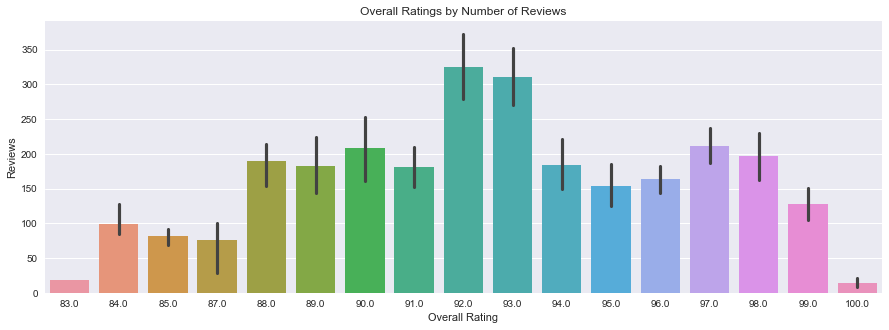

In [30]:
# I want to check the Overall Ratings (x-axis) according to the number of reviews (y-axis)
# I will use a bar chart to show this repartition.

ax = sns.barplot(x = "Overall Rating", y = "Reviews", data = airbnb_subset).set_title('Overall Ratings by Number of Reviews')
sns.set(rc={'figure.figsize':(15,5)})


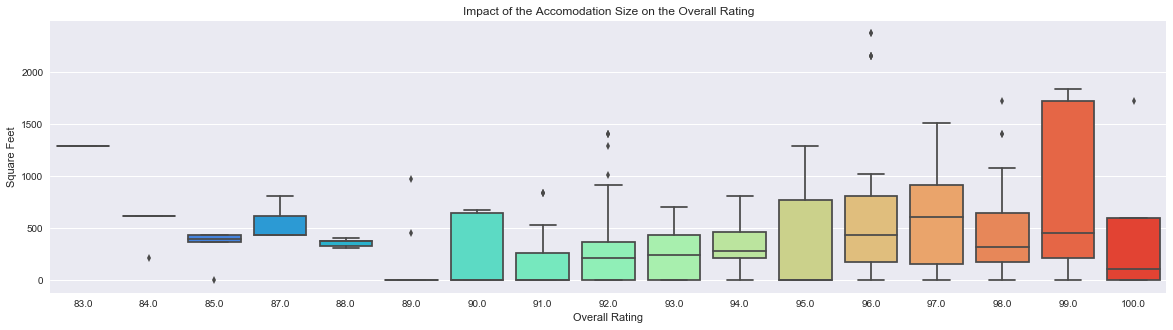

In [43]:
# I want to check the median ratings according to the Square Feet of the accomodation.
# I will use a box plot chart to see this information.

sns.boxplot(x = 'Overall Rating', y = 'Square Feet', data = airbnb_subset, palette = 'rainbow').set_title('Impact of the Accomodation Size on the Overall Rating')
sns.set(rc={'figure.figsize':(20,5)})


Text(0.5,0.98,'Relationship between Square Feet & Overall Rating according to Room Types')

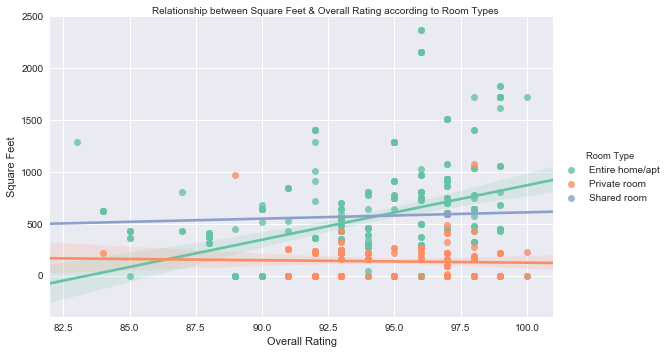

In [88]:
# I want to check the relationship between the Overall Rating (x-axis) and the Square Feet (y-axis) 
# according to the Room Type.

import seaborn as sns; sns.set(color_codes = True)

# Create lmplot
g = sns.lmplot(x = "Overall Rating", y = "Square Feet", hue = "Room Type", data = airbnb_subset, palette = 'Set2', size=5, aspect=1.6)

# Access the figure
fig = g.fig

# Add a title to the Figure
fig.suptitle("Relationship between Square Feet & Overall Rating according to Room Types", fontsize= 10)


In [114]:
# I need to change the data type of the Price column because it is considered as an object and not as a float.

airbnb_subset[['Price']] = airbnb_subset[['Price']].apply(pd.to_numeric)

Text(0,0.5,'Number of Accomodations')

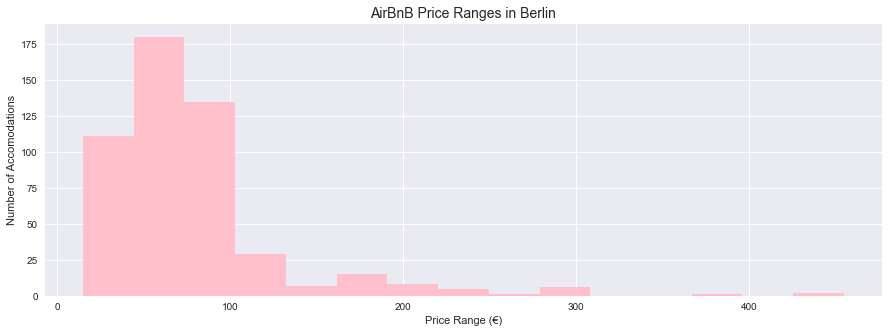

In [117]:
# I want to check the price ranges for AirBnB accomodations in Berlin

airbnb_subset['Price'].hist(bins=15, color ='pink', figsize=(15,5))

plt.title("AirBnB Price Ranges in Berlin", fontsize=14)

plt.xlabel('Price Range (€)')
plt.ylabel('Number of Accomodations')


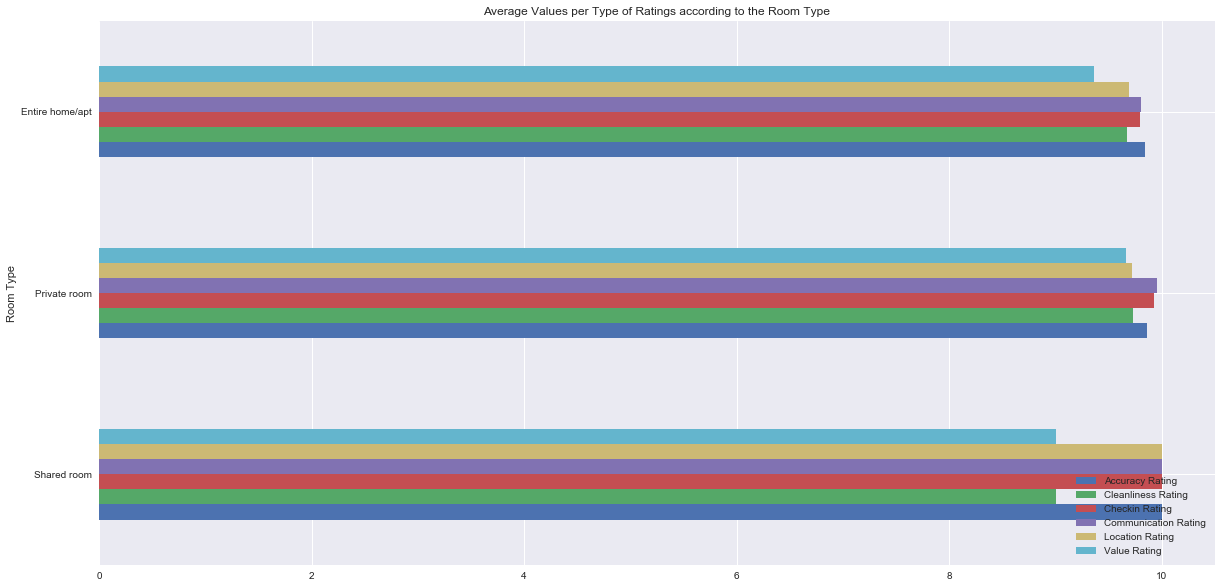

In [139]:
# I am creating a horizontal bar chart showing the average values per type of ratings (from 0 to 10) 
# according to the Room Type

rating_mix = airbnb_subset.groupby(["Room Type"]).agg('mean').sort_values(by = ["Overall Rating"], ascending = False)
rating_mix = rating_mix[["Accuracy Rating", "Cleanliness Rating", "Checkin Rating", "Communication Rating", "Location Rating", "Value Rating"]]
rating_mix.plot.barh(figsize=(20,10), title= "Average Values per Type of Ratings according to the Room Type")
